#**Spotify**

####This project is an analysis on...

By Thalia Dominguez, Nicholas Phan, & Edith Magana

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Project 2 DS-Spotify/'

Mounted at /content/drive


###Load the Data

In [2]:
all_df = pd.read_csv(drive_dir + 'data/data.csv')

In [3]:
all_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
by_genres_df = pd.read_csv(drive_dir + 'data/data_by_genres.csv')

In [5]:
by_year_df = pd.read_csv(drive_dir + 'data/data_by_year.csv')

In [6]:
by_artist_df = pd.read_csv(drive_dir + 'data/data_by_artist.csv')

In [7]:
with_genres_df = pd.read_csv(drive_dir + 'data/data_w_genres.csv')

#Cleaning the Data

First, let's check if there are any None or NaN values in all datasets.

In [8]:
all_df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [9]:
by_genres_df.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [10]:
by_year_df.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [11]:
by_artist_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [12]:
#There are actually a few entries under genres that is an empty bracket
with_genres_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

We don't have any NaN values in our data sets! Now, let's check the data types for each DataFrame to see if they match. 

In [13]:
all_df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [14]:
by_genres_df.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [15]:
by_year_df.dtypes

year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [16]:
by_artist_df.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

In [17]:
with_genres_df.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [18]:
all_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [19]:
all_df = all_df.drop(['artists', 'id', 'name', 'release_date'], axis=1)

#Looking at the individual data by year

In [20]:
def lregg(df,term):
  lr = LinearRegression()
  X = df[term].values.reshape(-1,1)
  return lr.fit(X, y=df['popularity'])



In [21]:
def r_squared(term, df):
  return np.corrcoef(df['popularity'], df[term])[0,1]**2


In [22]:
def loss_value_avg(lr, df, N, x_col, y_col='popularity'):
    diff = 0
    for i in range(N):
        actual_x = all_df[x_col].iloc[i]
        actual_y = all_df[y_col].iloc[i]
        predicted_y = lr.predict(actual_x.reshape(-1, 1))
        diff = diff + np.abs(actual_y - predicted_y) # Absolute value
    return diff[0] / N

In [23]:
def year_df(year):
  new_df = all_df[all_df['year'] == year]
  return new_df

#2020

In [24]:
twenty_df = year_df(2020)

In [25]:
desc = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo',
       'valence']

for i in desc:
  print(f'R^2 for {i} vs. popularity is {r_squared(i,twenty_df)}')

R^2 for acousticness vs. popularity is 0.004882769783890947
R^2 for danceability vs. popularity is 0.017939715091527947
R^2 for duration_ms vs. popularity is 0.038075251178160026
R^2 for energy vs. popularity is 0.0035795883625227712
R^2 for explicit vs. popularity is 0.0453216897806621
R^2 for instrumentalness vs. popularity is 1.9390523556986277e-05
R^2 for key vs. popularity is 0.0011175980604568438
R^2 for liveness vs. popularity is 0.0021500789558400804
R^2 for loudness vs. popularity is 0.00016830039867654113
R^2 for mode vs. popularity is 0.0013853882471947818
R^2 for popularity vs. popularity is 1.0
R^2 for speechiness vs. popularity is 0.009307053014373587
R^2 for tempo vs. popularity is 0.00013815564527000252
R^2 for valence vs. popularity is 0.0010849204597424523


#PCA Analysis

In [26]:
all_df = all_df[all_df['popularity'] != 0]

In [46]:
def pca(df):
  scaler = StandardScaler()

  features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'year']
# Separating out the features
  x = df.loc[:, features].values
# Separating out the target
  y = df.loc[:,['popularity']].values
# Standardizing the features
  x = StandardScaler().fit_transform(x)

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)

  pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
  pca_df['popularity'] = df['popularity'].tolist()

  pca_df['quartile'] = pd.qcut(pca_df['popularity'], q=4, labels=['not_popular', '2nd_q', '3rd_q', 'popular'])
  pca_quart_df = pca_df.drop('popularity', axis = 1)

  return pca_quart_df

In [66]:
def pca_scatter(df, title):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title(f'2 Component PCA {title}', fontsize = 20)
  targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
  colors = ['r', 'g', 'b']

  targets = ['not_popular','popular']
#targets = ['popular']
  colors = ['r', 'g']
#colors = ['g']
  for target, color in zip(targets,colors):
    indicesToKeep = df['quartile'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50, alpha = .5)
  ax.legend(targets)
  ax.grid()

In [50]:
def pca_box(df,quart):
  df[df['quartile'] == quart].boxplot()

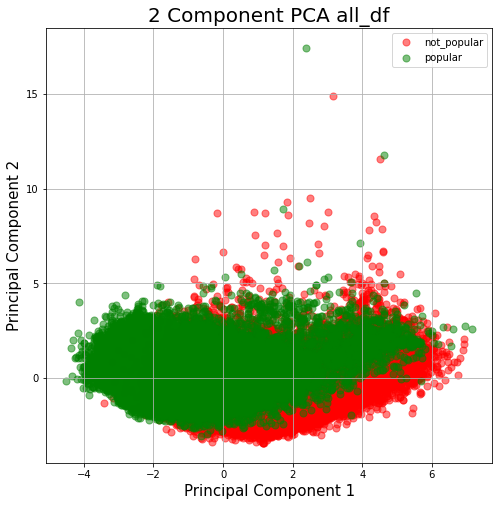

In [67]:
pca_all_df = pca(all_df)
pca_scatter(pca_all_df, 'all_df')

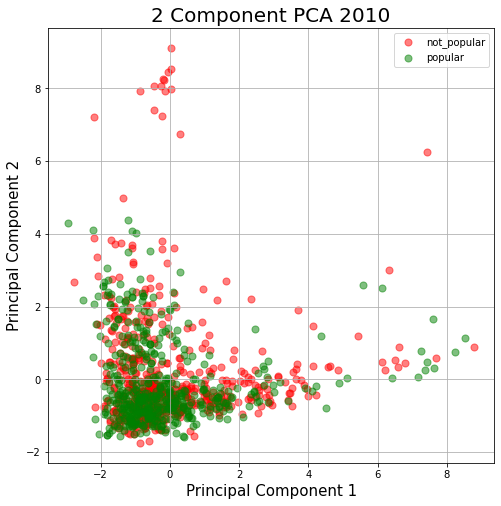

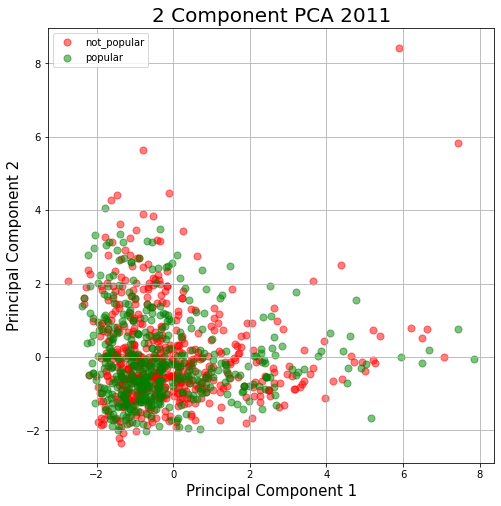

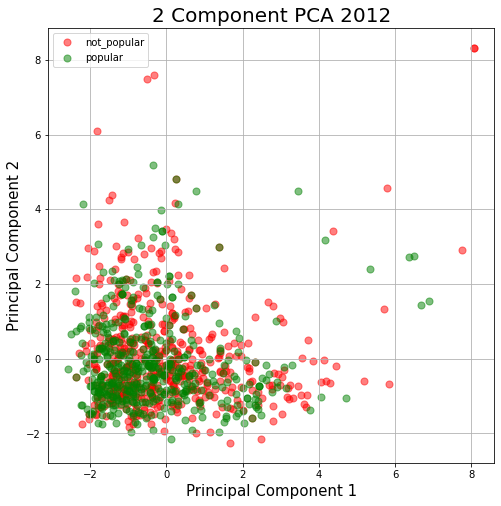

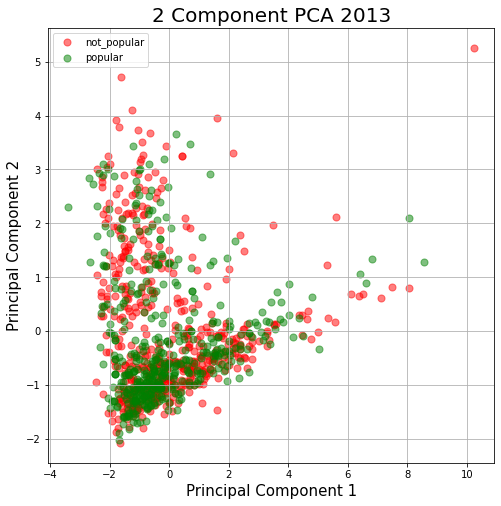

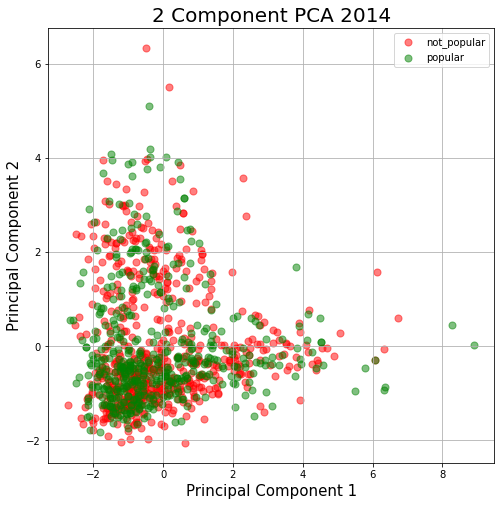

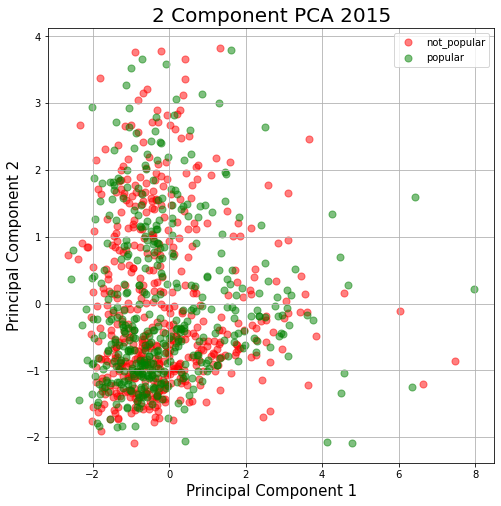

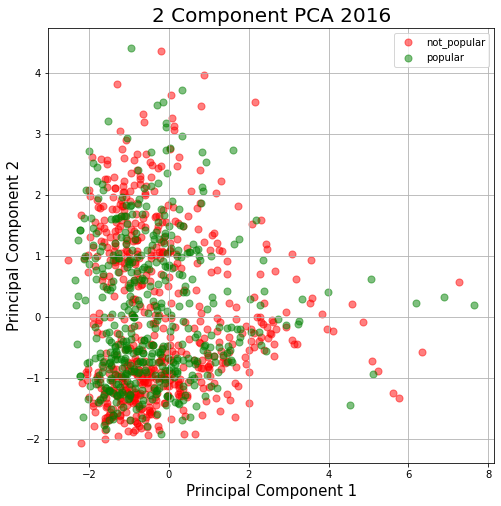

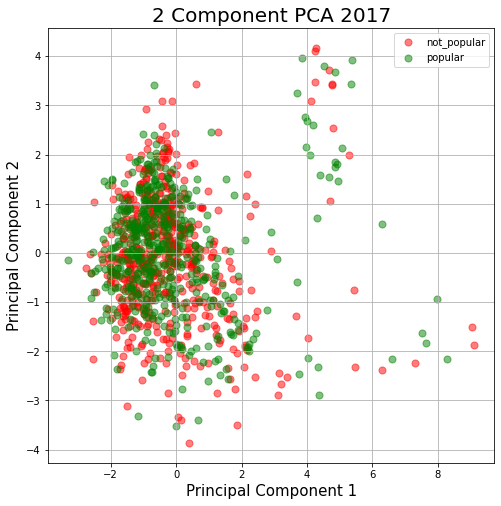

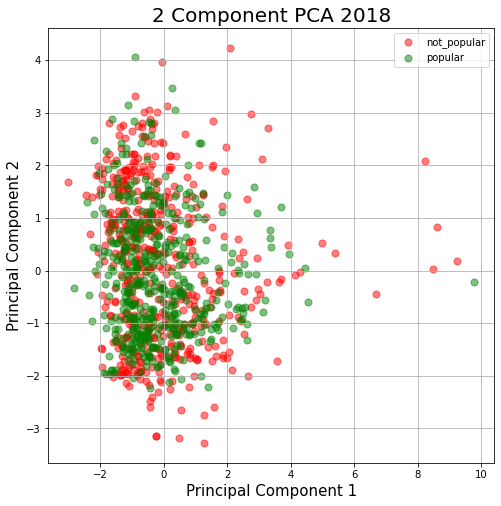

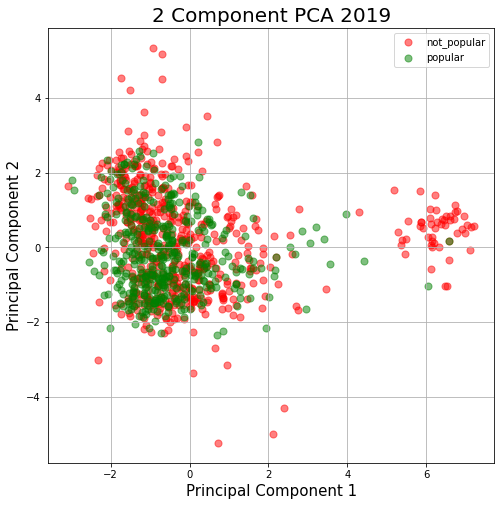

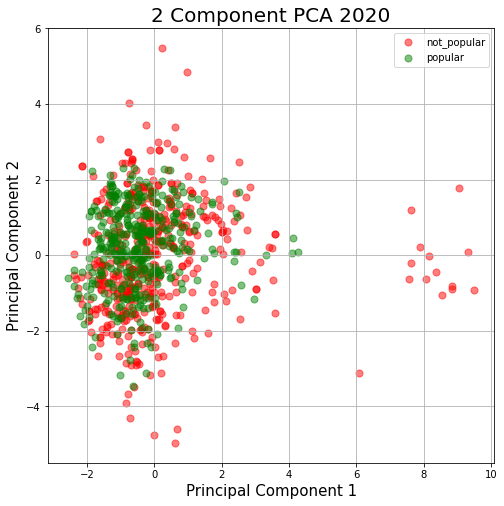

In [71]:
for i in range(2010,2021):
  df = year_df(i)
  pca_df = pca(df)
  pca_scatter(pca_df, i)

# Looking at histograms of popular vs. attributes and not popular vs. attributes

In [94]:
def histogram(df, att):

  df['quartile'] = pd.qcut(df['popularity'], q=4, labels=['not_popular', '2nd_q', '3rd_q', 'popular'])
  fig, axes = plt.subplots(4, 1)
  c = ['r', 'g', 'b', 'y']
  q = ['not_popular', '2nd_q', '3rd_q', 'popular']
  for i in range(len(q)):
    df[df['quartile'] == q[i]][att].plot(kind = 'hist', ax = axes[i], title = f'{q[i].title()} ({att})', figsize = (8,8), color = c[i])

  fig.tight_layout()

In [ ]:
col = all_df.columns.tolist()
for att in col:
  histogram(all_df, att)

In [ ]:
for att in col:
  histogram(year_df(2020), att)